In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [4]:
%cd gdrive/MyDrive/study/빅데이터마이닝 실습/MNIST

/content/gdrive/MyDrive/study/빅데이터마이닝 실습/MNIST


In [20]:
%ls

common/  MNIST_forward.ipynb  pretrained/


In [5]:
import sys
import os
import pickle
import numpy as np
#sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/MNIST')  # 구글 드라이브 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import sigmoid, softmax
from keras.datasets import mnist

# 3.6.1 MNIST 데이터셋
'''
0~9 숫자 이미지로 구성.
훈련 이미지 60000장, 시험 이미지 10000장
28*28 크기의 회색조 이미지이며 각 픽셀은 0~255의 값을 가짐
레이블은 정답에 해당하는 숫자
'''
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784)
(60000,)
(10000, 784)
(10000,)


5
(784,)
(28, 28)


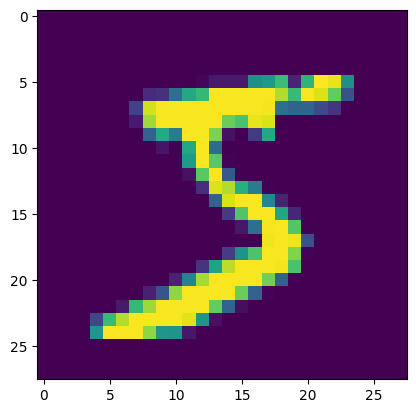

In [6]:
from matplotlib.pyplot import imshow
# 3.6.1 MNIST 이미지 확인해보기

img = x_train[0]
label = t_train[0]
print(label)  # 5
print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 원래 이미지 모양으로 변형
print(img.shape)  # (28, 28)

imshow(img)

5
(784,)
(28, 28)


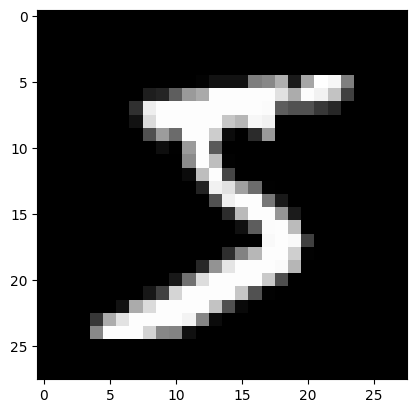

In [14]:
from matplotlib.pyplot import imshow
# 3.6.1 MNIST 이미지 확인해보기

img = x_train[0]
label = t_train[0]
print(label)  # 5
print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 원래 이미지 모양으로 변형
print(img.shape)  # (28, 28)

imshow(img, cmap="gray")

In [26]:
# 3.6.2 신경망의 추론 처리

from keras.datasets import mnist

def get_data():
    (x_train, t_train), (x_test, t_test) = mnist.load_data()
    x_train = x_train.reshape(60000, 784)
    x_test = x_test.reshape(10000, 784)
    return x_test, t_test


def init_network():
    with open("pretrained/sample_weight.pkl", 'rb') as f:
        # 학습된 가중치 매개변수가 담긴 파일
        # 학습 없이 바로 추론을 수행
        network = pickle.load(f)

    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    ##################################
    # 매개변수들의 크기를 확인해보고, 은닉층이 2개인 신경망을 작성하시오
    '''
    입력층 784개, 출력층 10개,
    은닉층1 50개, 은닉층2 100개로 구성
    '''
    ##################################

    return y


In [27]:
# 3.6.2 신경망의 추론 처리

from keras.datasets import mnist

def get_data():
    (x_train, t_train), (x_test, t_test) = mnist.load_data()
    x_train = x_train.reshape(60000, 784)
    x_test = x_test.reshape(10000, 784)
    return x_test, t_test


def init_network():
    with open("pretrained/sample_weight.pkl", 'rb') as f:
        # 학습된 가중치 매개변수가 담긴 파일
        # 학습 없이 바로 추론을 수행
        network = pickle.load(f)

    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    # 은닉층1
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)

    # 은닉층2
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)

    # 출력층
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


In [28]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0


for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9207


In [29]:
# 3.6.3 배치 처리
batch_size = 100
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9207
